In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

## Hipótesis inicial:
#### *Las palabras utilizadas tienen gran relación con la intención del mensaje, si se usan palabras como "costs", "stuck", "Obama" el mensaje será de ataque; mientras qeu al usar palabras más "amables" como "please", "join", "great" el mensaje será de apoyo. Además, el sesgo tendrá influencia, si es partidario será de ataque, y al ser neutral tendera a ser de apoyo*

In [2]:
df = pd.read_csv('../data/clean_political_social_media.csv')
df.head()

unit_id  audience      bias  message   source  cantidad_caracteres  \
0  766192485  national  partisan   attack  twitter                   85   
1  766192486  national   neutral  support  twitter                  136   
2  766192493  national  partisan  support  twitter                  139   
3  766192495  national  partisan   attack  twitter                  110   
4  766192501  national   neutral  support  twitter                  128   

            cargo language_name  cantidad_arrobas  cantidad_hashtag  ...  \
0         Senator       English                 0                 1  ...   
1  Representative       English                 0                 0  ...   
2  Representative       English                 0                 2  ...   
3  Representative       English                 0                 0  ...   
4  Representative       English                 1                 1  ...   

   tiene_stuck  tiene_higher  tiene_spawning  tiene_please  tiene_join  \
0            0             1               0             0           0   
1            0             0               0             1           1   
2            0             0               0             0           0   
3            0             0               0             0           0   
4            0             0               0             0           0   

   tiene_great  tiene_vote  tiene_share  tiene_applaud  tiene_clinton  
0            0           0            0              0              0  
1            0           0            0              0              0  
2            1           0            0              0              1  
3            0           0            0              0              0  
4            0           0            0              0              0  

[5 rows x 26 columns]

### Observamos cual es la proporción de los tipos/intenciones de mensajes

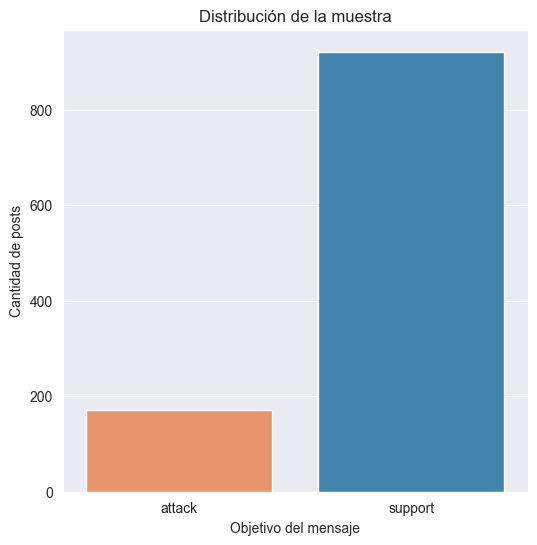

Porcentajes de posts de apoyo en la muestra: 84.26349496797805
Porcentajes de posts de ataque en la muestra: 15.736505032021958


In [3]:
rcParams['figure.figsize'] = 6,6
paleta = ["#fc8d59","#3288bd"]

df['message'].value_counts()
sns.countplot(x='message', data=df, palette=paleta)
plt.xlabel("Objetivo del mensaje")
plt.ylabel("Cantidad de posts")
plt.title("Distribución de la muestra")
plt.show()

attack = len(df[df['message']=='attack'])
support = len(df[df['message']=='support'])
ataque_porciento =( attack / (attack + support) * 100)
apoyo_porciento= (support / (attack + support) * 100)
print('Porcentajes de posts de apoyo en la muestra:', apoyo_porciento)
print('Porcentajes de posts de ataque en la muestra:', ataque_porciento)

Como podemos ver, no es un 50/50. Esto se va a tener en cuenta más adelante, para mantener esta proporción

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093 entries, 0 to 1092
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   unit_id              1093 non-null   int64 
 1   audience             1093 non-null   object
 2   bias                 1093 non-null   object
 3   message              1093 non-null   object
 4   source               1093 non-null   object
 5   cantidad_caracteres  1093 non-null   int64 
 6   cargo                1093 non-null   object
 7   language_name        1093 non-null   object
 8   cantidad_arrobas     1093 non-null   int64 
 9   cantidad_hashtag     1093 non-null   int64 
 10  tiene_obama          1093 non-null   int64 
 11  tiene_obamacare      1093 non-null   int64 
 12  tiene_costs          1093 non-null   int64 
 13  tiene_venezuela      1093 non-null   int64 
 14  tiene_demandar       1093 non-null   int64 
 15  tiene_remember       1093 non-null   int64 
 16  tiene_

---

# 1- Escalado
Esto lo realizamso para poder comparar las variables, y que ninguna tenga mayor influencia por el hecho de tener menor o mayor rango.

#### Identifico cuales son las variables númericas que requieren ser escaladas

In [5]:
numericas = df.select_dtypes(exclude=['object']).columns
numericas

Index(['unit_id', 'cantidad_caracteres', 'cantidad_arrobas',
       'cantidad_hashtag', 'tiene_obama', 'tiene_obamacare', 'tiene_costs',
       'tiene_venezuela', 'tiene_demandar', 'tiene_remember', 'tiene_stuck',
       'tiene_higher', 'tiene_spawning', 'tiene_please', 'tiene_join',
       'tiene_great', 'tiene_vote', 'tiene_share', 'tiene_applaud',
       'tiene_clinton'],
      dtype='object')

Lo que se hará es primero observar como es su distribución, y si hay outliers, mediante lso gráficos; y luego se aplicara el escalado correspondiente.

## Cantidad de caracteres

<AxesSubplot: title={'center': 'Boxplot decantidad_caracteres'}, xlabel='cantidad_caracteres'>

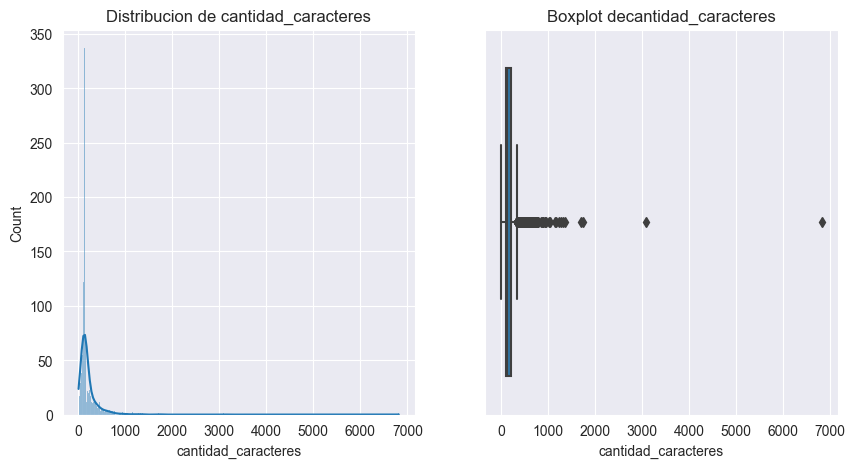

In [6]:
variable = 'cantidad_caracteres'

fig, ax = plt.subplots(1,2,figsize=(10,5))

ax[0].set_title(f"Distribucion de {variable}")
sns.histplot(data = df, x = f"{variable}", kde=True, ax = ax[0])

ax[1].set_title(f"Boxplot de{variable}")
sns.boxplot(data = df, x = f"{variable}", ax=ax[1])

Podemos observar, que parecería ser una distribución normal, pero con outliers. Por lo tanto, realizamos un escalamiento robusto.

In [7]:
from sklearn.preprocessing import RobustScaler

rb_scaler = RobustScaler()
df['cantidad_caracteres'] = rb_scaler.fit_transform(df[['cantidad_caracteres']])
df.head()

unit_id  audience      bias  message   source  cantidad_caracteres  \
0  766192485  national  partisan   attack  twitter            -0.602273   
1  766192486  national   neutral  support  twitter            -0.022727   
2  766192493  national  partisan  support  twitter             0.011364   
3  766192495  national  partisan   attack  twitter            -0.318182   
4  766192501  national   neutral  support  twitter            -0.113636   

            cargo language_name  cantidad_arrobas  cantidad_hashtag  ...  \
0         Senator       English                 0                 1  ...   
1  Representative       English                 0                 0  ...   
2  Representative       English                 0                 2  ...   
3  Representative       English                 0                 0  ...   
4  Representative       English                 1                 1  ...   

   tiene_stuck  tiene_higher  tiene_spawning  tiene_please  tiene_join  \
0            0             1               0             0           0   
1            0             0               0             1           1   
2            0             0               0             0           0   
3            0             0               0             0           0   
4            0             0               0             0           0   

   tiene_great  tiene_vote  tiene_share  tiene_applaud  tiene_clinton  
0            0           0            0              0              0  
1            0           0            0              0              0  
2            1           0            0              0              1  
3            0           0            0              0              0  
4            0           0            0              0              0  

[5 rows x 26 columns]

## Cantidad arrobas

<AxesSubplot: title={'center': 'Boxplot decantidad_arrobas'}, xlabel='cantidad_arrobas'>

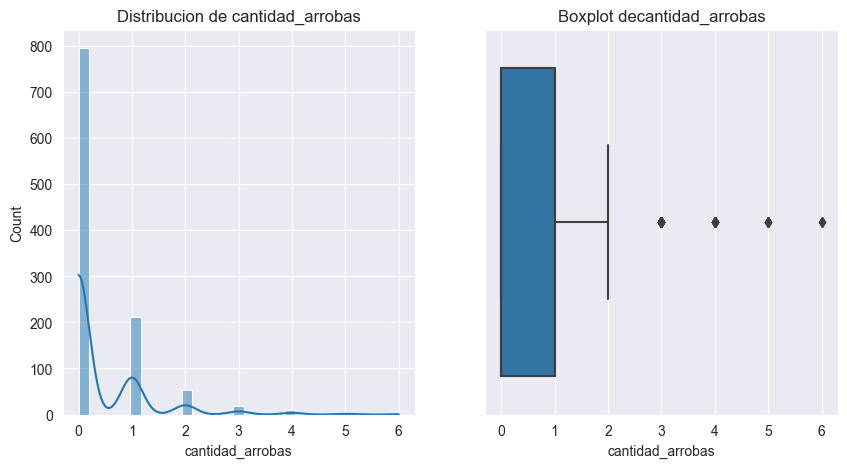

In [8]:
variable = 'cantidad_arrobas'

fig, ax = plt.subplots(1,2,figsize=(10,5))

ax[0].set_title(f"Distribucion de {variable}")
sns.histplot(data = df, x = f"{variable}", kde=True, ax = ax[0])

ax[1].set_title(f"Boxplot de{variable}")
sns.boxplot(data = df, x = f"{variable}", ax=ax[1])

Al no ser una distribución normal, y además vemos que tiene outliers, se realizará un escalamiento de minimo-máximo

In [9]:
from sklearn.preprocessing import MinMaxScaler

minmaxscaler = MinMaxScaler()

df['cantidad_arrobas']= minmaxscaler.fit_transform(df[['cantidad_arrobas']])

df.head()

unit_id  audience      bias  message   source  cantidad_caracteres  \
0  766192485  national  partisan   attack  twitter            -0.602273   
1  766192486  national   neutral  support  twitter            -0.022727   
2  766192493  national  partisan  support  twitter             0.011364   
3  766192495  national  partisan   attack  twitter            -0.318182   
4  766192501  national   neutral  support  twitter            -0.113636   

            cargo language_name  cantidad_arrobas  cantidad_hashtag  ...  \
0         Senator       English          0.000000                 1  ...   
1  Representative       English          0.000000                 0  ...   
2  Representative       English          0.000000                 2  ...   
3  Representative       English          0.000000                 0  ...   
4  Representative       English          0.166667                 1  ...   

   tiene_stuck  tiene_higher  tiene_spawning  tiene_please  tiene_join  \
0            0             1               0             0           0   
1            0             0               0             1           1   
2            0             0               0             0           0   
3            0             0               0             0           0   
4            0             0               0             0           0   

   tiene_great  tiene_vote  tiene_share  tiene_applaud  tiene_clinton  
0            0           0            0              0              0  
1            0           0            0              0              0  
2            1           0            0              0              1  
3            0           0            0              0              0  
4            0           0            0              0              0  

[5 rows x 26 columns]

## Cantidad hashtag

<AxesSubplot: title={'center': 'Boxplot decantidad_hashtag'}, xlabel='cantidad_hashtag'>

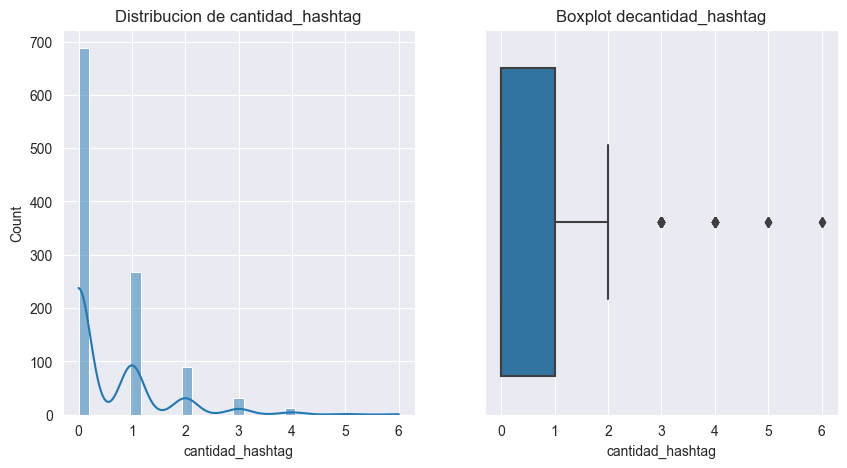

In [10]:
variable = 'cantidad_hashtag'

fig, ax = plt.subplots(1,2,figsize=(10,5))

ax[0].set_title(f"Distribucion de {variable}")
sns.histplot(data = df, x = f"{variable}", kde=True, ax = ax[0])

ax[1].set_title(f"Boxplot de{variable}")
sns.boxplot(data = df, x = f"{variable}", ax=ax[1])

Esta es la misa situación de la anterior variable, por lo que tambien aplicamos un escalamiento minimo-máximo

In [11]:
from sklearn.preprocessing import MinMaxScaler

minmaxscaler = MinMaxScaler()

df['cantidad_hashtag']= minmaxscaler.fit_transform(df[['cantidad_hashtag']])

df.head()

unit_id  audience      bias  message   source  cantidad_caracteres  \
0  766192485  national  partisan   attack  twitter            -0.602273   
1  766192486  national   neutral  support  twitter            -0.022727   
2  766192493  national  partisan  support  twitter             0.011364   
3  766192495  national  partisan   attack  twitter            -0.318182   
4  766192501  national   neutral  support  twitter            -0.113636   

            cargo language_name  cantidad_arrobas  cantidad_hashtag  ...  \
0         Senator       English          0.000000          0.166667  ...   
1  Representative       English          0.000000          0.000000  ...   
2  Representative       English          0.000000          0.333333  ...   
3  Representative       English          0.000000          0.000000  ...   
4  Representative       English          0.166667          0.166667  ...   

   tiene_stuck  tiene_higher  tiene_spawning  tiene_please  tiene_join  \
0            0             1               0             0           0   
1            0             0               0             1           1   
2            0             0               0             0           0   
3            0             0               0             0           0   
4            0             0               0             0           0   

   tiene_great  tiene_vote  tiene_share  tiene_applaud  tiene_clinton  
0            0           0            0              0              0  
1            0           0            0              0              0  
2            1           0            0              0              1  
3            0           0            0              0              0  
4            0           0            0              0              0  

[5 rows x 26 columns]

## Variables de: 0 y 1 :"tiene ..."

Al ser siempre solo estas dos variables, siendo un si/no, no hace falta que se escalen.

---

# 3- Encoding de varibales categroicas
Convertimos las variables categóricas a numéricas

#### ¿Cuales son las variables categóricas?

In [12]:
categoricas = df.select_dtypes(exclude=['float', 'integer']).columns
categoricas

Index(['audience', 'bias', 'message', 'source', 'cargo', 'language_name'], dtype='object')

#### Revisamos, como se conforman las variables para saber que encoding aplicar

In [13]:
print(f"Los valores unicos de audience son {df.audience.unique()}")
print(f"Los valores unicos de bias son {df.bias.unique()}")
print(f"Los valores unicos de source son {df.source.unique()}")
print(f"Los valores unicos de cargo son {df.cargo.unique()}")
print(f"Los valores unicos de language son {df.language_name.unique()}")

Los valores unicos de audience son ['national' 'constituency']
Los valores unicos de bias son ['partisan' 'neutral']
Los valores unicos de source son ['twitter' 'facebook']
Los valores unicos de cargo son ['Senator' 'Representative']
Los valores unicos de language son ['English' 'Spanish , Castilian' 'Desconocido']


## Audience, bias, source, cargo
Debido al hecho de que estas variables, solo cuentan con dos categóricas, se aplica un encoding binario, con el OneHotEncoder.

In [14]:
from sklearn.preprocessing import OneHotEncoder

binary_encoder = OneHotEncoder(sparse=False, drop='if_binary')
df['audience'] = binary_encoder.fit_transform(df[['audience']])
df['bias'] = binary_encoder.fit_transform(df[['bias']])
df['source'] = binary_encoder.fit_transform(df[['source']])
df['cargo'] = binary_encoder.fit_transform(df[['cargo']])

df.head()

unit_id  audience  bias  message  source  cantidad_caracteres  cargo  \
0  766192485       1.0   1.0   attack     1.0            -0.602273    1.0   
1  766192486       1.0   0.0  support     1.0            -0.022727    0.0   
2  766192493       1.0   1.0  support     1.0             0.011364    0.0   
3  766192495       1.0   1.0   attack     1.0            -0.318182    0.0   
4  766192501       1.0   0.0  support     1.0            -0.113636    0.0   

  language_name  cantidad_arrobas  cantidad_hashtag  ...  tiene_stuck  \
0       English          0.000000          0.166667  ...            0   
1       English          0.000000          0.000000  ...            0   
2       English          0.000000          0.333333  ...            0   
3       English          0.000000          0.000000  ...            0   
4       English          0.166667          0.166667  ...            0   

   tiene_higher  tiene_spawning  tiene_please  tiene_join  tiene_great  \
0             1               0             0           0            0   
1             0               0             1           1            0   
2             0               0             0           0            1   
3             0               0             0           0            0   
4             0               0             0           0            0   

   tiene_vote  tiene_share  tiene_applaud  tiene_clinton  
0           0            0              0              0  
1           0            0              0              0  
2           0            0              0              1  
3           0            0              0              0  
4           0            0              0              0  

[5 rows x 26 columns]

## Language_name

En este caso como son 3 categorías, también se utiliza OneHotEncoder, pero no "if_binary". Se crearán nuevas columnas ocn las categorías, que diran si si (1) o no (0) corresponde a ese registro

In [15]:
from sklearn.preprocessing import OneHotEncoder

language_ohe = OneHotEncoder(sparse=False)

language_ohe.fit(df[['language_name']])

language_ohe.categories_

[array(['Desconocido', 'English', 'Spanish , Castilian'], dtype=object)]

In [16]:
from sklearn.preprocessing import OneHotEncoder

language_ohe = OneHotEncoder(sparse=False)

df['Desconocido'],df['English'],df['Spanish , Castilian']  = language_ohe.fit_transform(df[['language_name']]).T

df.drop(columns=['language_name'], inplace = True)

df.head()

unit_id  audience  bias  message  source  cantidad_caracteres  cargo  \
0  766192485       1.0   1.0   attack     1.0            -0.602273    1.0   
1  766192486       1.0   0.0  support     1.0            -0.022727    0.0   
2  766192493       1.0   1.0  support     1.0             0.011364    0.0   
3  766192495       1.0   1.0   attack     1.0            -0.318182    0.0   
4  766192501       1.0   0.0  support     1.0            -0.113636    0.0   

   cantidad_arrobas  cantidad_hashtag  tiene_obama  ...  tiene_please  \
0          0.000000          0.166667            1  ...             0   
1          0.000000          0.000000            0  ...             1   
2          0.000000          0.333333            0  ...             0   
3          0.000000          0.000000            0  ...             0   
4          0.166667          0.166667            0  ...             0   

   tiene_join  tiene_great  tiene_vote  tiene_share  tiene_applaud  \
0           0            0           0            0              0   
1           1            0           0            0              0   
2           0            1           0            0              0   
3           0            0           0            0              0   
4           0            0           0            0              0   

   tiene_clinton  Desconocido  English  Spanish , Castilian  
0              0          0.0      1.0                  0.0  
1              0          0.0      1.0                  0.0  
2              1          0.0      1.0                  0.0  
3              0          0.0      1.0                  0.0  
4              0          0.0      1.0                  0.0  

[5 rows x 28 columns]

## Encoding de la variable target: _message_

Al ser esta la variable target, a la que se quiere llegar, se utiliza LabelEncoder. Que funciona también de manera binaria, 0 y 1, para las dos categorías.

In [17]:
print(f"Los valores unicos de audience son {df.message.unique()}")

Los valores unicos de audience son ['attack' 'support']


In [18]:
from sklearn.preprocessing import LabelEncoder

df['message'] = LabelEncoder().fit_transform(df['message'])
df.head()

unit_id  audience  bias  message  source  cantidad_caracteres  cargo  \
0  766192485       1.0   1.0        0     1.0            -0.602273    1.0   
1  766192486       1.0   0.0        1     1.0            -0.022727    0.0   
2  766192493       1.0   1.0        1     1.0             0.011364    0.0   
3  766192495       1.0   1.0        0     1.0            -0.318182    0.0   
4  766192501       1.0   0.0        1     1.0            -0.113636    0.0   

   cantidad_arrobas  cantidad_hashtag  tiene_obama  ...  tiene_please  \
0          0.000000          0.166667            1  ...             0   
1          0.000000          0.000000            0  ...             1   
2          0.000000          0.333333            0  ...             0   
3          0.000000          0.000000            0  ...             0   
4          0.166667          0.166667            0  ...             0   

   tiene_join  tiene_great  tiene_vote  tiene_share  tiene_applaud  \
0           0            0           0            0              0   
1           1            0           0            0              0   
2           0            1           0            0              0   
3           0            0           0            0              0   
4           0            0           0            0              0   

   tiene_clinton  Desconocido  English  Spanish , Castilian  
0              0          0.0      1.0                  0.0  
1              0          0.0      1.0                  0.0  
2              1          0.0      1.0                  0.0  
3              0          0.0      1.0                  0.0  
4              0          0.0      1.0                  0.0  

[5 rows x 28 columns]

---

# 4- Arbol de decisión
Se prueban diferentes modelos, intentando llegar al mayor accuracy con los parámetros utilizados, y se calculan las métricas respectivas para luego compararlas y elegir el mejor

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve, roc_auc_score

In [20]:
X =df.drop(columns=['message', 'unit_id'])
y = df['message']

Separamos entre los datos que se usarán para entrenar y para testear. Al colocar random_state nos aseguramos que siempre se realicen las mismas pruebas y que no varíen las métricas.

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [22]:
from sklearn.tree import DecisionTreeClassifier

## Primer intento
Sin ninguna restricción, ni criterio (utiliza gini por ser el default), sin estratificar

In [23]:
dtree1 = DecisionTreeClassifier(random_state=10)
dtree1= dtree1.fit(X_train,y_train)

y_pred1 = dtree1.predict(X_test)

from sklearn import metrics

print("Accuracy:", metrics.accuracy_score(y_test, y_pred1))

Accuracy: 0.8567073170731707


In [24]:
accuracy1 = accuracy_score(y_test,y_pred1)
recall1 = recall_score(y_test,y_pred1)
precision1 = precision_score(y_test,y_pred1)
roc1 = roc_auc_score(y_test,y_pred1)

## Estratificamos target

Ahora estratificamos la variable independiente, y, nuestro target, para mantener la proporcion en todos los "pedazos" de entrenamiento. Para ello se usa el **stratify**.

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,test_size=0.30, random_state=10)

In [26]:
dtree2 = DecisionTreeClassifier(random_state=10)
dtree2= dtree2.fit(X_train,y_train)

y_pred2 = dtree2.predict(X_test)

from sklearn import metrics

print("Accuracy:", metrics.accuracy_score(y_test, y_pred2))

Accuracy: 0.8567073170731707


In [27]:
accuracy2 = accuracy_score(y_test,y_pred2)
recall2 = recall_score(y_test,y_pred2)
precision2 = precision_score(y_test,y_pred2)
roc2 = roc_auc_score(y_test,y_pred2)

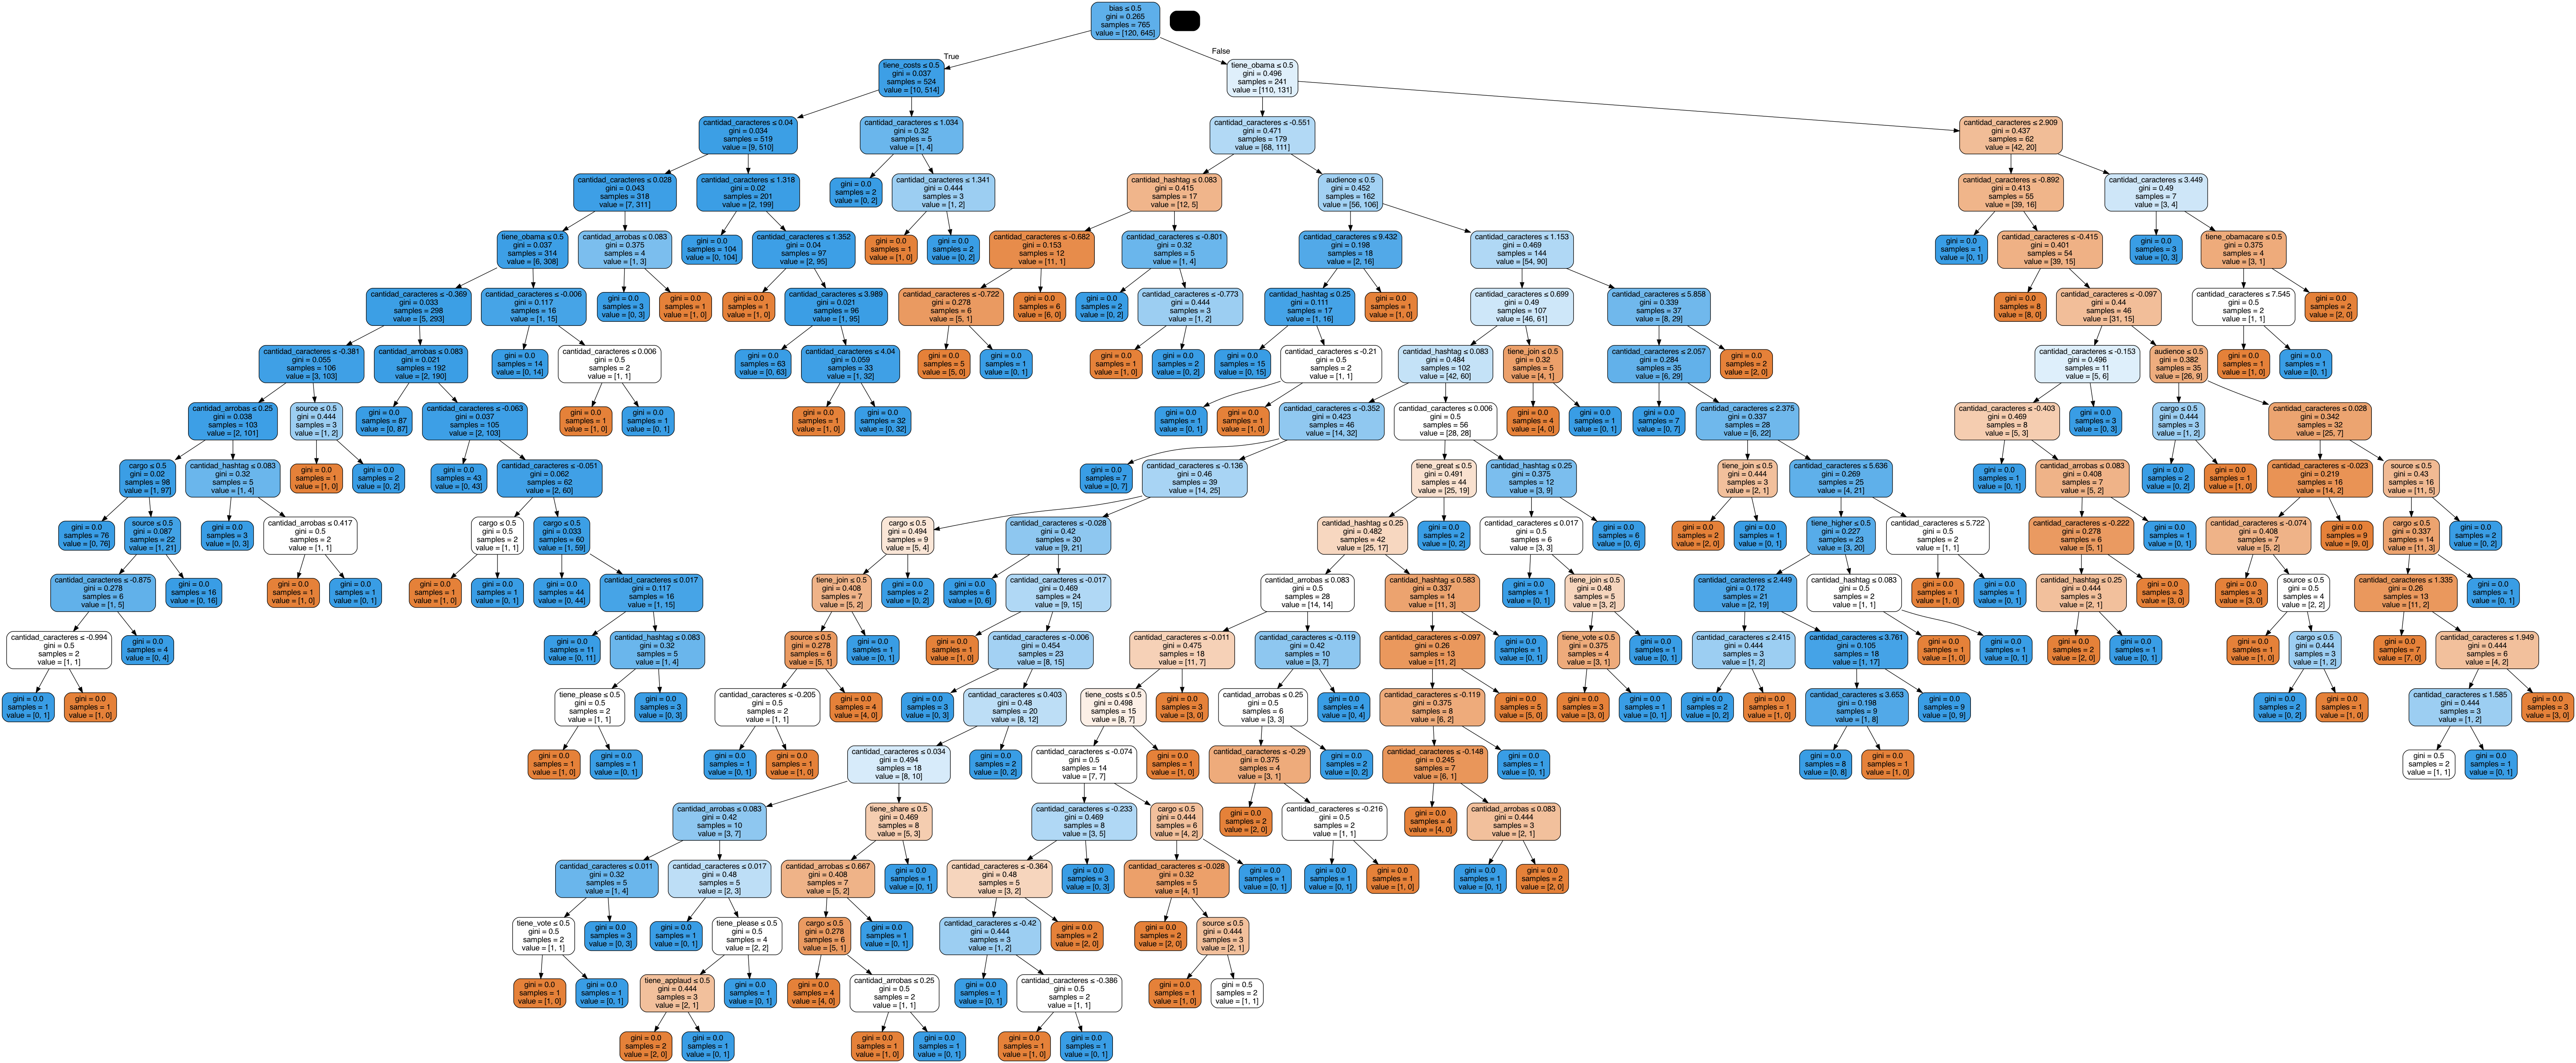

In [28]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(dtree2, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('../dtree_graphs/dtree_posts_1.png')
Image(graph.create_png())

# Mejorando el arbol de decision

### Primer mejora
Se mejoró, **aclarando el criterio** (aunque es el mismo que es el anterior), y se agregó un **máximo (2) de niveles**
El criterio de gini mide la frecuencia en la que los elementos del dataset serán mal etiquetados cuando son etiquetados al azar. El minimo es 0, lo que significa que el nodo es puro, es decir que los elementos adentro son todos de na clase, por lo que no se volverá a dividir el nodo. El máximo posible es 0.5
Solo tomando max_depth, 2 es en el que se obtuvo el accuracy más alto, con estas restricciones.

In [29]:
dtree3 = DecisionTreeClassifier(criterion="gini", max_depth=2, random_state=10)

dtree3 = dtree3.fit(X_train,y_train)

y_pred3 = dtree3.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred3))

Accuracy: 0.8719512195121951


In [30]:
accuracy3 = accuracy_score(y_test,y_pred3)
recall3 = recall_score(y_test,y_pred3)
precision3 = precision_score(y_test,y_pred3)
roc3 = roc_auc_score(y_test,y_pred3)

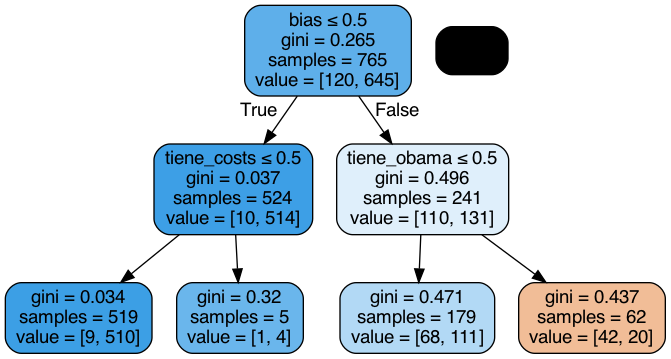

In [31]:
dot_data = StringIO()
export_graphviz(dtree3, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names = X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('../dtree_graphs/dtree_posts_2.png')
Image(graph.create_png())

### Segunda mejora

Se cambió el criterio a **entropy**. Este indica el desorden de las variables con el target, lo más óptimo es cuanto menor es el número. Llega a su valor máximo (1) cuando la probabilidad de las dos clases es la misma.
Y el máximo de nivel en el arbol, se cambió a **2** que es donde se encontró el máximo accuracy.

In [32]:
dtree4 = DecisionTreeClassifier(criterion="entropy", max_depth=2, random_state=10)

dtree4 = dtree4.fit(X_train,y_train)

y_pred4 = dtree4.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred4))

Accuracy: 0.8719512195121951


In [33]:
accuracy4 = accuracy_score(y_test,y_pred4)
recall4 = recall_score(y_test,y_pred4)
precision4 = precision_score(y_test,y_pred4)
roc4 = roc_auc_score(y_test,y_pred4)

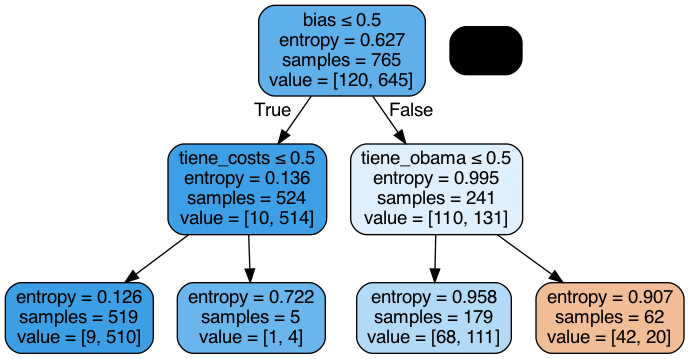

In [34]:
dot_data = StringIO()
export_graphviz(dtree4, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names = X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('../dtree_graphs/dtree_posts_3.png')
Image(graph.create_png())

### Tercer mejora

Se volvio a probar con el criterio de **gini**, y se utilizó **min_samples_leaf de 3** y **max_depth de 9**. Min_smaples_leaf refiere a la cantidad minima de elementos para que haya un leaf node

In [35]:
dtree5 = DecisionTreeClassifier(criterion='gini',
                               min_samples_leaf=3,
                               max_depth=9,
                               random_state=10)

dtree5 = dtree5.fit(X_train,y_train)

y_pred5 = dtree5.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred5))

Accuracy: 0.8810975609756098


In [36]:
accuracy5 = accuracy_score(y_test,y_pred5)
recall5 = recall_score(y_test,y_pred5)
precision5 = precision_score(y_test,y_pred5)
roc5 = roc_auc_score(y_test,y_pred5)

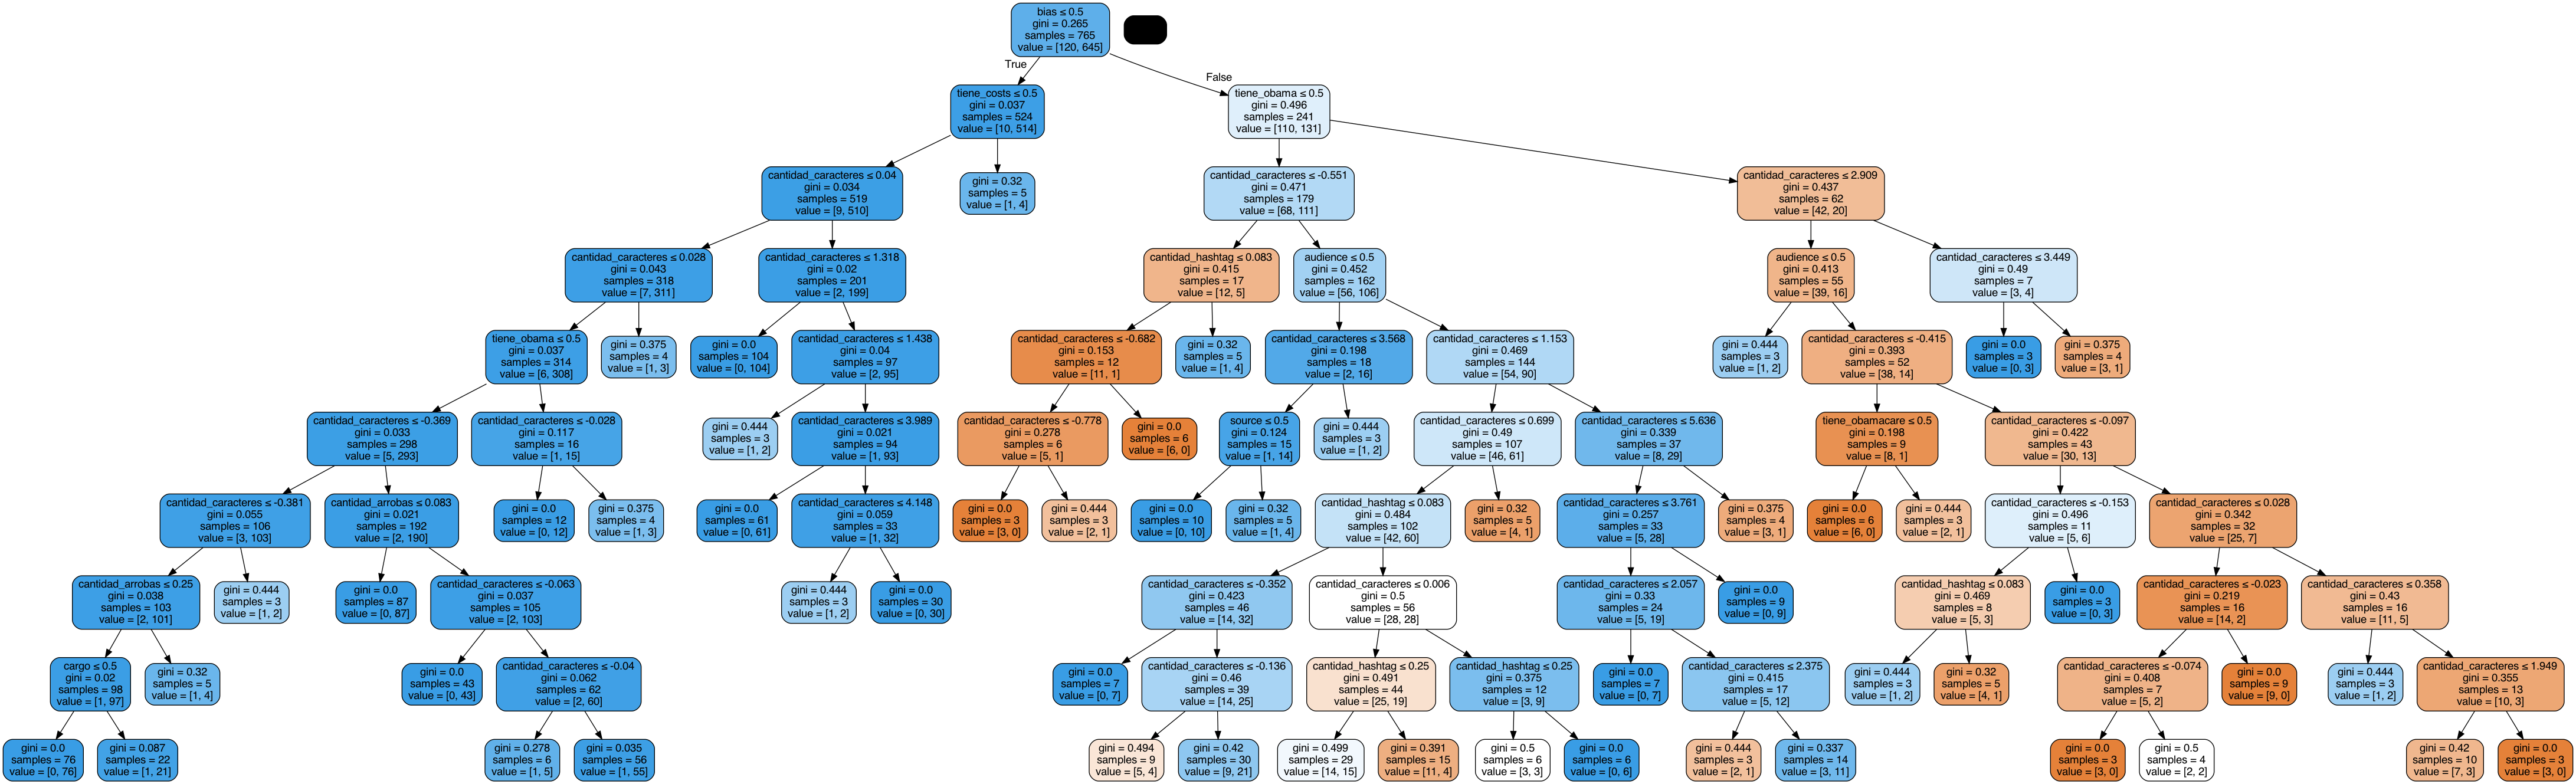

In [37]:
dot_data = StringIO()
export_graphviz(dtree5, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names = X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('../dtree_graphs/dtree_posts_4.png')
Image(graph.create_png())

#### Nuevo cambio:
Volviendo a probar con el criterio de **entropy**, se colocó un **min_samples_leaf de 3**, **max_depth de 5** y agregando **min_samples_split de 3**. Esto úlitmo es la cantidad mínima de elementos en un nodo interno para que ocurra una división, y si el nodo tiene menos que ese número, se convierte en un hoja.
No lo considero como una mejora nueva ya que vemos que baja el nivel de accuracy, por eso no se siguió probando con otras posibilidades

In [38]:
dtree6 = DecisionTreeClassifier(criterion='entropy',
                               min_samples_leaf=3,
                               min_samples_split=3,
                               max_depth=5,
                            random_state=10)

dtree6 = dtree6.fit(X_train,y_train)

y_pred6 = dtree6.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred6))

Accuracy: 0.875


In [39]:
accuracy6 = accuracy_score(y_test,y_pred6)
recall6 = recall_score(y_test,y_pred6)
precision6 = precision_score(y_test,y_pred6)
roc6 = roc_auc_score(y_test,y_pred6)

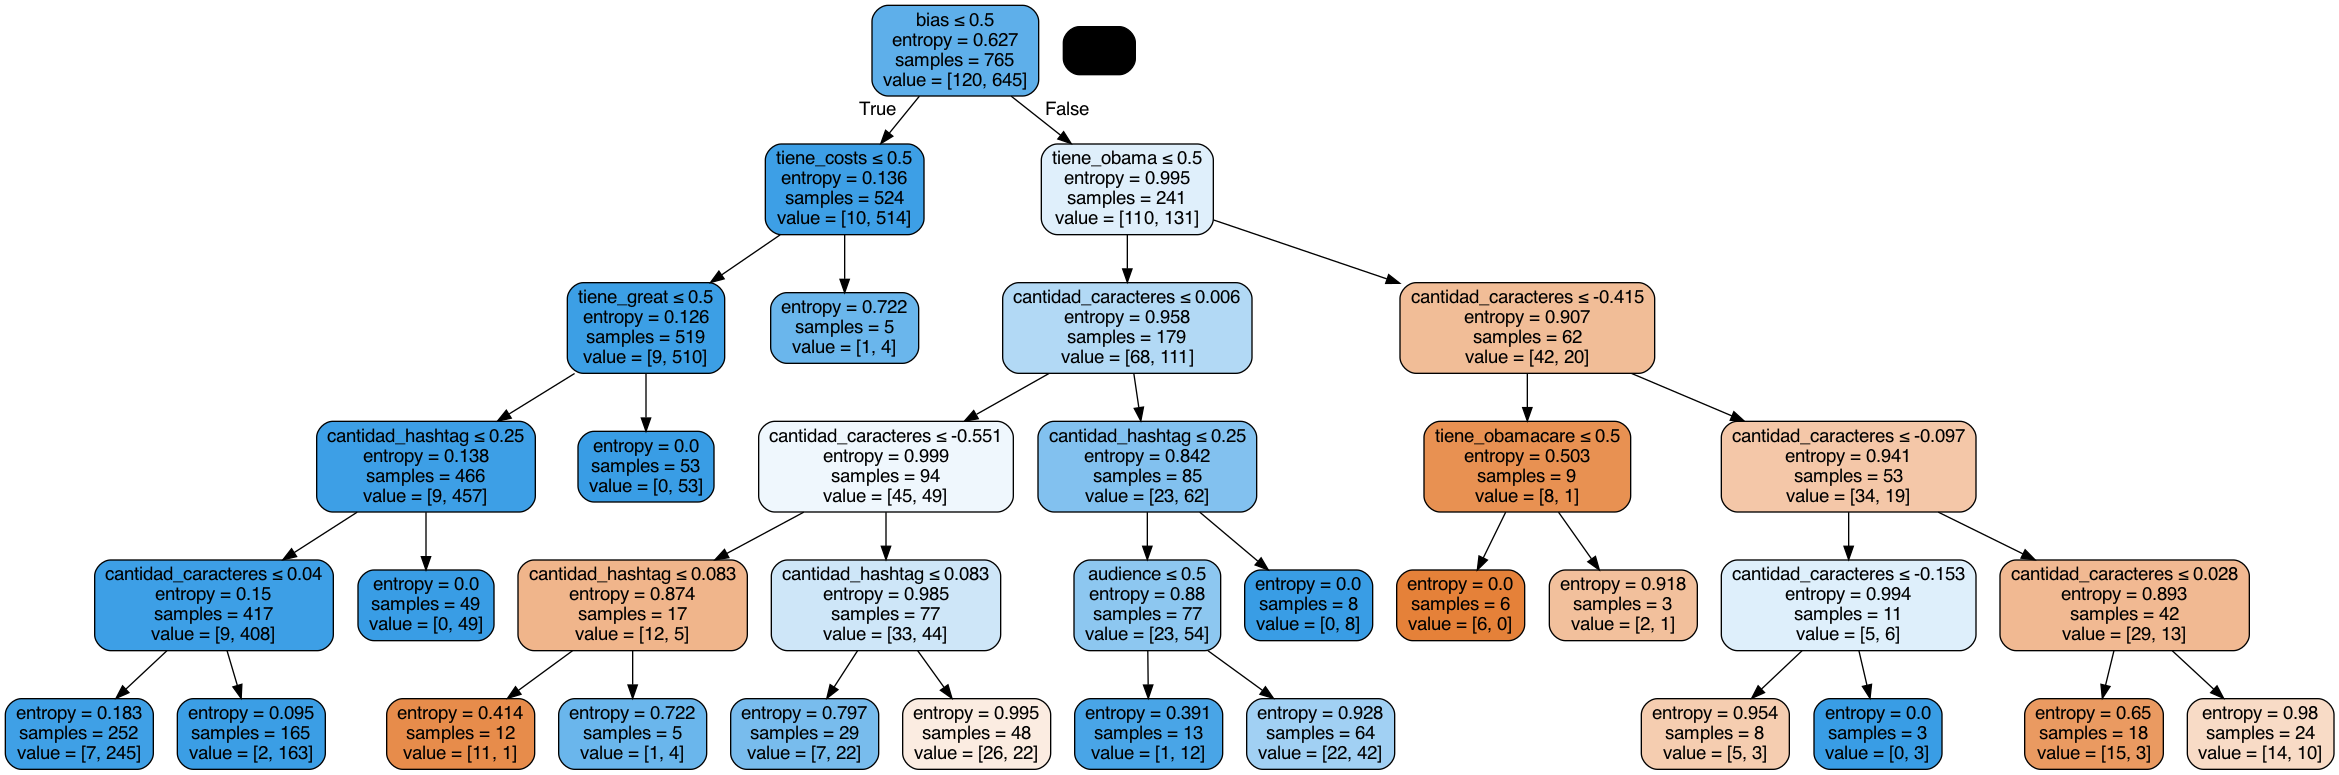

In [40]:
dot_data = StringIO()
export_graphviz(dtree6, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names = X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('../dtree_graphs/dtree_posts_4.png')
Image(graph.create_png())

---

# 5- Evaluación del modelo

## Importancia de variables
Viendo los arboles de decisión, se puede observar que el root node en todos ellos es **bias**, lo cual tambien se podía observar cuando habíamos hecho el análisis previo. Los primeros nodos internos que dividen al árbol de decición  son: **tiene_costs** y **tiene_obama**, variables que se habían creado en relación a las palabras "propias" de cada tipo de publicación".
Otra variable que aparece como nodos internos es **cantidad_caracteres**, y en segunda instancia **cantidad_hashtag**
En menor medida nos encontramos con: **tiene_great**, **tiene_obamacare** y **audience**

Esto que se pudo analizar viendo los árboles de decisión, se puede ver en el siguiente código, en el que vemos el score de cada columna, teniendo el siguiente orden de relevancia:
1. bias
2. cantidad_caracteres
3. tiene_obama
4. cantidad_hashtag
5. cantidad_arrobas
6. source
7. cargo
8. audience
9. tiene_please
10. tiene_vote
11. tiene_join	
12. tiene_obamacare	
13. tiene_great	
14. tiene_costs
15. tiene_applaud
16. tiene_higher

Hay muchas otras variables de idiomas, y otras que se habían creado con respecto a palabras que terminaron no teniendo influencia.

In [41]:
from sklearn.inspection import permutation_importance

model = DecisionTreeClassifier().fit(X,y)
permutation_score = permutation_importance(model, X, y, n_repeats=100)
importance_df = pd.DataFrame(np.vstack((X.columns,
                                        permutation_score.importances_mean)).T,
                            columns = ['feature','feature_importance'])

print("Despues de la permutacion de variables, asi decrece el score en terminos de variables:")
importance_df = importance_df.sort_values(by="feature_importance", ascending = False)
importance_df

Despues de la permutacion de variables, asi decrece el score en terminos de variables:


feature feature_importance
1                  bias           0.190494
3   cantidad_caracteres           0.147466
7           tiene_obama           0.050119
6      cantidad_hashtag           0.044831
5      cantidad_arrobas           0.034986
2                source           0.034437
4                 cargo           0.024483
0              audience           0.015993
16         tiene_please           0.007914
19           tiene_vote           0.006331
17           tiene_join           0.003907
9           tiene_costs           0.003056
18          tiene_great           0.002031
21        tiene_applaud           0.001967
14         tiene_higher           0.001171
8       tiene_obamacare           0.000915
20          tiene_share                0.0
23          Desconocido                0.0
22        tiene_clinton                0.0
24              English                0.0
13          tiene_stuck                0.0
15       tiene_spawning                0.0
12       tiene_remember                0.0
11       tiene_demandar                0.0
10      tiene_venezuela                0.0
25  Spanish , Castilian                0.0

In [42]:
from sklearn.inspection import permutation_importance

model = DecisionTreeClassifier().fit(X,y)
permutation_score = permutation_importance(model, X, y, n_repeats=100)
importance_df = pd.DataFrame(np.vstack((X.columns,
                                        permutation_score.importances_mean)).T,
                            columns = ['feature','feature_importance'])

print("Despues de la permutacion de variables, asi decrece el score en terminos de variables:")
importance_df = importance_df.sort_values(by="feature_importance", ascending = False)
importance_df

In [43]:
Modelo = ("Arbol 1", "Árbol 2", "Árbol 3", "Arbol 4", "Árbol 5", "Árbol 6")
Accuracy = ([accuracy1, accuracy2, accuracy3, accuracy4, accuracy5, accuracy6])
Recall = ([recall1, recall2, recall3, recall4, recall5, recall6])
Precision = ([precision1, precision2, precision3, precision4, precision5, precision6])
Roc_Val = ([roc1, roc2, roc3, roc4, roc5, roc6])

tabla_comparacion = pd.DataFrame({"Modelo": Modelo, "Accuracy": Accuracy, "Recall": Recall, "Precision": Precision, "ROC Value": Roc_Val})

tabla_comparacion['Promedio'] = tabla_comparacion.mean(axis=1)
tabla_comparacion['Desvío'] = tabla_comparacion.std(axis=1)

tabla_comparacion.round(3)

/var/folders/k1/v56sqwl12zb66_jgqzt3lxf00000gn/T/ipykernel_27873/1496687510.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  tabla_comparacion['Promedio'] = tabla_comparacion.mean(axis=1)
/var/folders/k1/v56sqwl12zb66_jgqzt3lxf00000gn/T/ipykernel_27873/1496687510.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  tabla_comparacion['Desvío'] = tabla_comparacion.std(axis=1)


Modelo  Accuracy  Recall  Precision  ROC Value  Promedio  Desvío
0  Arbol 1     0.857   0.919      0.916      0.681     0.843   0.097
1  Árbol 2     0.857   0.913      0.916      0.735     0.855   0.073
2  Árbol 3     0.872   0.971      0.887      0.659     0.847   0.115
3  Arbol 4     0.872   0.971      0.887      0.659     0.847   0.115
4  Árbol 5     0.881   0.953      0.910      0.726     0.868   0.085
5  Árbol 6     0.875   0.942      0.912      0.731     0.865   0.081

Mirando el accuracy, podríamos decir que el Arbol 5 es el mejor. El objetivo de este trabajo es poder predecir exactamente (si es posible) la intención de la publicación, o sea que mientras más se hayan predicho correctamente en relación a las que no, mejor es nuestro modelo.
Lo ideal también sería ver el "precision", el cual es un número alto, pero no es el más dentro de lso otros modelos hechos, lo mismo sucede con el "recall" y el "ROC value", pero en promedio podemos ver que es el mejor.

## Analizamos más en profundidad el "mejor modelo"

Los valores de salida son:

In [44]:
y_test.value_counts()

1    276
0     52
Name: message, dtype: int64

Los valores de salida son:

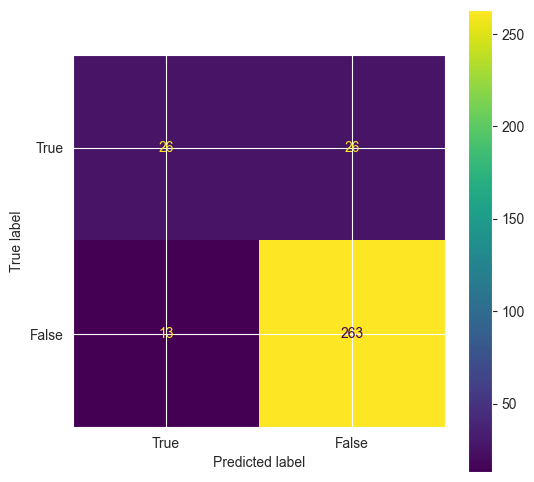

[[ 26  26]
 [ 13 263]]
True Positive:  26 False Negative:  26
False Positive:  13 True Negative:  263


In [45]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

confusion = confusion_matrix(y_test, y_pred5)
cmd = ConfusionMatrixDisplay(confusion_matrix = confusion, display_labels=['True','False'])
cmd.plot()
plt.show()

print(confusion)
print('True Positive: ', confusion[0][0], 'False Negative: ', confusion[0][1])
print('False Positive: ', confusion[1][0], 'True Negative: ', confusion[1][1])

Los números en la diagonal (de izquierda a derecha) son aquellos que fueron predicho de manera correcta, es decir qu elso que se dijeron como attack eran attack, y lo mismo con los de support. Los otrs números, 26 y 13 son los falsos negativos y positivos. Es bueno que el true negative nos haya dado alto, porque significa que "es correcto el modelo".

### Reporte de clasificación

In [46]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred5))

              precision    recall  f1-score   support

           0       0.67      0.50      0.57        52
           1       0.91      0.95      0.93       276

    accuracy                           0.88       328
   macro avg       0.79      0.73      0.75       328
weighted avg       0.87      0.88      0.87       328



Analizando el Árbol 5, podemos además de lo que ya se vio, ver el f1-score que es un "promedio ponderado armónico" de precision y recall. Mientras más cercanos a 1 sean las métricas, mejor es. En este caso, nos dan al rededor de 0,83, o que consideramos como un buen resultado.

#### Error:
Es `1-accuracy`. Por lo tanto, el resultado que obtuvimos es `0,118` lo que es un número chico.

In [47]:
error = 1-accuracy5
error

0.11890243902439024

### ROC Curve

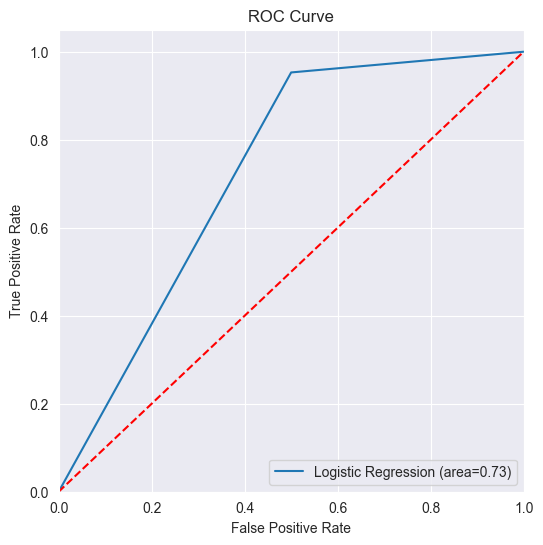

In [48]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, y_pred5)
fpr, tpr, thresholds = roc_curve(y_test, y_pred5)

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area=%0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

En la curva se representa la tasa de verdaderos positivos frente a tasa de falsos positivos en diferentes umbrales de clasificacón.
Con el AUC se mide el area debajo de la curva, y mientras más grande mejor, es decir mientras mas alejada de la de 45º mejor.
Nuestro resultado no es el más óptimo, pero dentro de todo es un buen número.

### ¿Es un buen modelo?

Viendo todas las métricas que nos dieron bastante altas, podemos afirmar que es un buen modelo

Miro las columnas que se toman en cuenta para la predicción:

In [49]:
X.columns

Index(['audience', 'bias', 'source', 'cantidad_caracteres', 'cargo',
       'cantidad_arrobas', 'cantidad_hashtag', 'tiene_obama',
       'tiene_obamacare', 'tiene_costs', 'tiene_venezuela', 'tiene_demandar',
       'tiene_remember', 'tiene_stuck', 'tiene_higher', 'tiene_spawning',
       'tiene_please', 'tiene_join', 'tiene_great', 'tiene_vote',
       'tiene_share', 'tiene_applaud', 'tiene_clinton', 'Desconocido',
       'English', 'Spanish , Castilian'],
      dtype='object')

In [50]:
df.head()

unit_id  audience  bias  message  source  cantidad_caracteres  cargo  \
0  766192485       1.0   1.0        0     1.0            -0.602273    1.0   
1  766192486       1.0   0.0        1     1.0            -0.022727    0.0   
2  766192493       1.0   1.0        1     1.0             0.011364    0.0   
3  766192495       1.0   1.0        0     1.0            -0.318182    0.0   
4  766192501       1.0   0.0        1     1.0            -0.113636    0.0   

   cantidad_arrobas  cantidad_hashtag  tiene_obama  ...  tiene_please  \
0          0.000000          0.166667            1  ...             0   
1          0.000000          0.000000            0  ...             1   
2          0.000000          0.333333            0  ...             0   
3          0.000000          0.000000            0  ...             0   
4          0.166667          0.166667            0  ...             0   

   tiene_join  tiene_great  tiene_vote  tiene_share  tiene_applaud  \
0           0            0           0            0              0   
1           1            0           0            0              0   
2           0            1           0            0              0   
3           0            0           0            0              0   
4           0            0           0            0              0   

   tiene_clinton  Desconocido  English  Spanish , Castilian  
0              0          0.0      1.0                  0.0  
1              0          0.0      1.0                  0.0  
2              1          0.0      1.0                  0.0  
3              0          0.0      1.0                  0.0  
4              0          0.0      1.0                  0.0  

[5 rows x 28 columns]

__Suponiendo que los valores son:__
- audience: national (1) y constituency (0)
- bias: partisan (1) y neutral (0)
- source: twitter (1) y facebook (0)
- cargo: Senator(1) y Representative (0)
- El resto de las columnas 1 es si, y 0 no
- message: support (1) y attack (0)

Esto lo pude ver mirando a la tabla al principio de este markdown y como se encuentra ahora luego de haber hecho el encoding, y pudiendo comproborar ocn el unit_id que la una fila corresponde a la misma publicación.

**Realizamos una prediccion con estos datos:**
- audience: national
- bias: partisian
- source: facebook
- cantidad_caracteres: -0.34
- cargo: Representative
- cantidad_arrobas: 0.0
- cantidad_hashtag: 0.2
- tiene_obama: si
- tiene_obamacare: si
- tiene_costs: si
- tiene_venezuela:si
- tiene_demandar: no
- tiene_remember: no
- tiene_stuck: si
- tiene_higher: no
- tiene_spawning: no
- tiene_please: no
- tiene_join: no
- tiene_great: no
- tiene_vote: no
- tiene_share: no
- tiene_applaud:no
- tiene_clinton:no
- Desconocido: no
- English:si
- Spanish , Castilian:no

Se eligieron variables y categorías que luego de haber hecho el modelo y análisis, tengan el "tinte" de attack, y nos de este como resultado como predicción.

In [51]:
prediction = dtree5.predict([[1.0,1.0,1.0,-0.34,0.0,0.0,0.2,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0.0,1.0,0.0]])[0]

prediction

/Users/Melimarkstein/.conda/envs/TP_final/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0

Nuestra instancia predicha, nos dio como resultado 0, que es "attack", como se buscaba con las variables/categorías que se usaron


---

# 7- Conclusión

La hipótesis original se cumplió en gran medida, ya que el sesgo fue la principal variable, y las palabras tenían influencia, pero no en la medida que se esperaba, ya que hay muchas que no tuvieron ningún poder sobre el resultado.
Además de que otras variables, como la cantidad de caracteres, también tienen importancia, que no se había tenido en cuenta.

Hay que tener en cuenta que si se quiere aplicar este modelo a publicaciones de políticos argentinos, no se va a poder hacer de manera directa, ya que será en otro idioma; y hay elementos políticos y sociales diferentes.